In [1]:
# Codes for Dr. Cohen's course 

import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.fftpack
import random
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn-dark-palette")

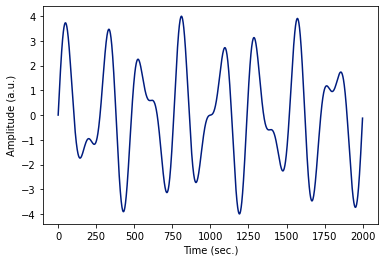

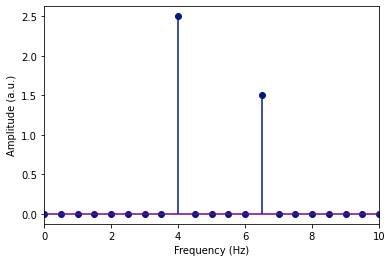

In [29]:
## The DTFT in loop-form

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time ) \
        + 1.5 * np.sin( 2*np.pi*6.5*time )

plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (a.u.)')
plt.plot(signal)
plt.show()

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros((len(signal)),dtype=complex)

for fi in range(0,pnts):
    
    # create complex sine wave
    csw = np.exp( -1j * 2*np.pi * fi * fourTime )
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs[fi] = np.sum( np.multiply(signal,csw) ) / pnts

# extract amplitudes
ampls = 2*np.abs(fCoefs)

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()


# Converting indices to frequencies

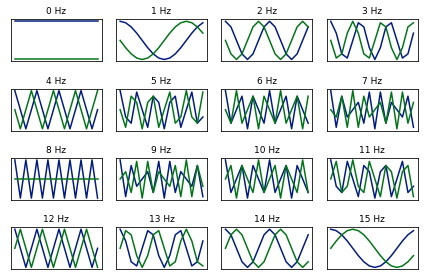

In [70]:
pnts = 16 # number of time points
fourTime = np.array(range(0,pnts))/pnts

for fi in range(0,pnts):
    # create complex sine wave
    csw = np.exp( -1j * 2*np.pi * fi * fourTime )

    # and plot it
    loc = np.unravel_index(fi,[4, 4],'F')
    fig = plt.subplot2grid((4,4),(loc[1],loc[0]))
    plt.plot(fourTime,np.real(csw))
    plt.plot(fourTime,np.imag(csw))
    plt.title(f'{fi} Hz',fontsize=9)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()

In [71]:
power = 1/4*(2/(4*np.pi**2)+(1/8-(3*math.sqrt(2))/(4*np.pi))**2+1/16+(3/8-(math.sqrt(2))/(4*np.pi))**2)
print(power)

power = (1/4) * (0.05+0.0452+1/4+0.068)

0.056813190523658436


# Scaling Fourier coefficients

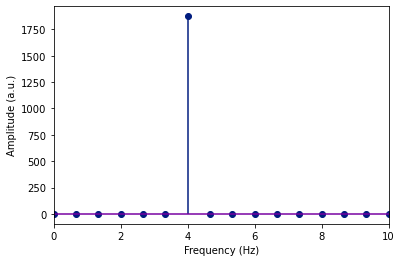

srate: 1000
time: (0.0, 1.499)
pnts: 1500
fourTime: (0.0, 1.0)
hz: (0.0, 500.0)


In [103]:
## incorrect amplitude units without normalizations

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,1.5,1/srate)  # time vector in seconds
pnts   = len(time)   # number of time points
signal = 2.5 * np.sin( 2*np.pi * 4 * time )

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )

# extract amplitudes
ampls = np.abs(fCoefs);

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

print(f"srate: {srate}")
print(f"time: {time[0], time[-1]}")
print(f"pnts: {pnts}")
print(f"fourTime: {fourTime[0], np.round(fourTime[-1])}")
print(f"hz: {hz[0], np.round(hz[-1])}")


# Phase